In [1]:
from gensim.models.doc2vec import Doc2Vec, TaggedLineDocument
from nltk.tokenize import word_tokenize
import pandas as pd
import spacy 
nlp = spacy.load("de_core_news_sm")
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import gzip,os,glob
import numpy as np
import pickle

import nltk
from nltk.corpus import wordnet as wn
from langdetect import detect
from sklearn.manifold import TSNE

<h1> Running the Doc2Vec Model </h1>
https://jlorince.github.io/viz-tutorial/

In [2]:
# Generate a list of tagged line documents, one per line from the file generated above
documents = [doc for doc in TaggedLineDocument('../data/df_content.txt')]

In [15]:
# Now just run the model. A simple little one-liner. Be sure to take advantages of the the `workers` option, which parallelizes the model automagically
model = Doc2Vec(documents, vector_size=200, window=5, min_count=5,workers=24)

In [16]:
# the resulting feature vectors are stored in `model.docvecs.doctag_syn0`, 
# so let's just save that numpy array
np.save('../data/features-w2v-200.npy',model.docvecs.doctag_syn0)

# vector normalization for tsne

from sklearn.preprocessing import Normalizer
nrm = Normalizer('l2')
normed = nrm.fit_transform(model.docvecs.doctag_syn0)
np.save('../data/features_normed-w2v-200.npy',normed)


C:\Users\Johannes\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `doctag_syn0` (Attribute will be removed in 4.0.0, use docvecs.vectors_docs instead).
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Johannes\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `doctag_syn0` (Attribute will be removed in 4.0.0, use docvecs.vectors_docs instead).
  if __name__ == '__main__':


In [17]:
np.load('../data/features_normed-w2v-200.npy')

array([[ 0.03053535,  0.11161806,  0.0106266 , ...,  0.1370697 ,
        -0.13401726, -0.08424285],
       [ 0.0595925 ,  0.09050083,  0.03031643, ...,  0.02756041,
        -0.08268553, -0.1164265 ],
       [-0.02558132, -0.00332501,  0.04575997, ...,  0.14851779,
        -0.04100908, -0.13188013],
       ...,
       [ 0.01688889,  0.08322632, -0.03282928, ..., -0.02531855,
        -0.02757705, -0.09588332],
       [-0.03309856,  0.14861377, -0.10164344, ..., -0.0283787 ,
        -0.10382543, -0.03620251],
       [-0.05233312, -0.00211811,  0.08078461, ...,  0.12756638,
        -0.14354254, -0.02850876]], dtype=float32)

In [18]:
test_npy = np.load('../data/features_normed-w2v-200.npy')
test_npy.shape

(18139, 200)

<h1>Step 2: Generate our 2D embedding</h1>
https://www.kaggle.com/jeffd23/visualizing-word-vectors-with-t-sne

In [19]:
# Creates TSNE model and plots it
x = []
y = []

def tsne_plot(model):
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca',
                      n_iter=2500, 
                      random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    #x = []
    #y = []
    
    global x,y
    
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        #plt.annotate(labels[i],
         #            xy=(x[i], y[i]),
          #           xytext=(5, 2),
           #          xytext=(5, 2),
            #         textcoords='offset points',
             #        ha='right',
              #       va='bottom')
    plt.show()


In [22]:
model.most_similar('natur')

C:\Users\Johannes\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('realität', 0.8944936990737915),
 ('gesellschaft', 0.8863744735717773),
 ('freiheit', 0.8785843849182129),
 ('wirklichkeit', 0.8765133023262024),
 ('politik', 0.8701029419898987),
 ('wahrnehmung', 0.8655453324317932),
 ('umwelt', 0.8541294932365417),
 ('demokratie', 0.8369512557983398),
 ('gewalt', 0.8328017592430115),
 ('wissenschaft', 0.8199347257614136)]

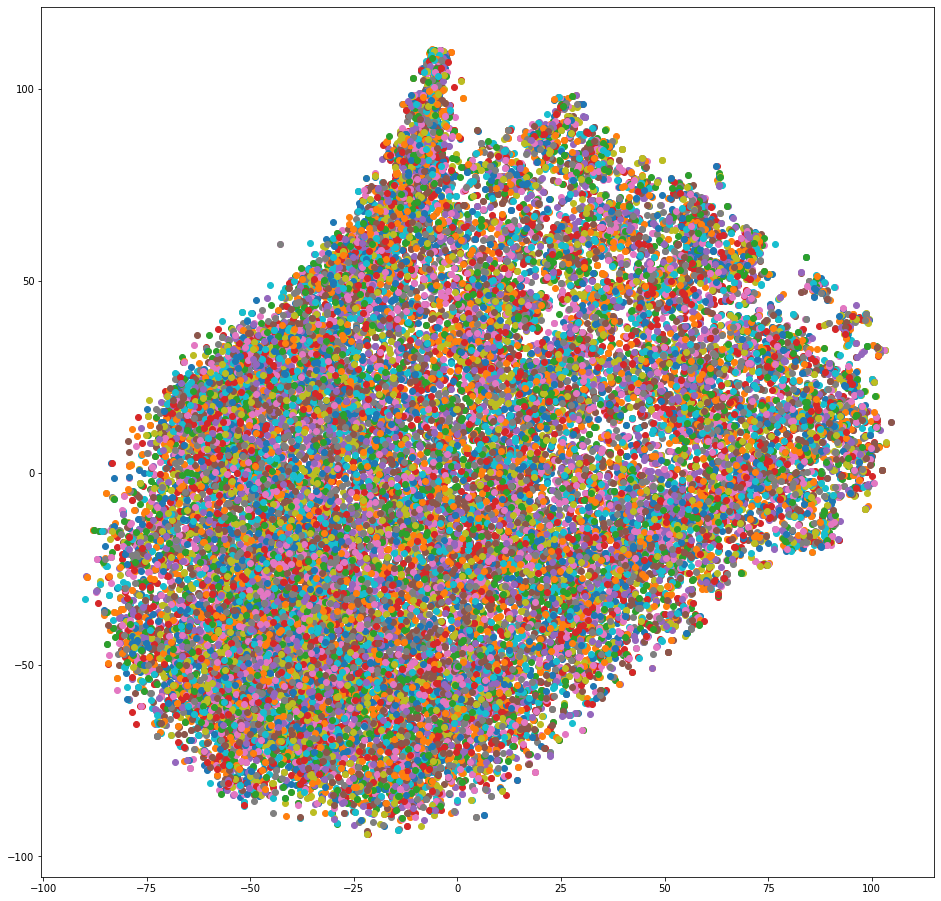

In [19]:
tsne_plot(model)

In [20]:
df_values = pd.DataFrame.from_dict({'x':x,'y':y})

In [21]:
print(df_values)

               x          y
0      71.162376  -5.892215
1      51.553856  76.783806
2      67.169281  64.197968
3      62.555157  80.085892
4      99.002998  15.991257
...          ...        ...
28813 -34.907349 -48.770184
28814 -43.381428 -66.298019
28815 -32.638405 -26.099672
28816 -52.191189 -66.394852
28817 -19.454037 -85.542526

[28818 rows x 2 columns]
